In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("SMS Spam Dataset.csv") # if you are using your pc then this line for loading data
# df = pd.read_csv("/kaggle/input/sms-spam-collection-a-more-diverse-dataset/train.csv") # if using kaggle notebook then this line
 

In [3]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
df.shape

(5574, 2)

In [5]:
df.isnull().sum()

sms      0
label    0
dtype: int64

# Basic Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
df.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# EDA Exploratory Data Analysis

# N-Gram Analysis


This code performs top N-grams analysis on text data using the CountVectorizer from scikit-learn. N-grams are contiguous sequences of n items from a given text, where items can be characters, syllables, or words. In this case, we're looking at bi-grams (2-grams), which are pairs of words occurring together in the text.

The code first creates a CountVectorizer object with a specified ngram_range of (2, 2), meaning it will consider only bi-grams. It also removes English stop words to exclude common words like "and", "the", etc.

Then, it transforms the text data into a matrix of token counts using the fit_transform method of CountVectorizer. It calculates the sum of occurrences of each bi-gram in the text and sorts them in descending order.

Finally, it visualizes the top 20 bi-grams using a bar plot, where the x-axis represents the bi-grams and the y-axis represents their frequencies. The purpose is to identify the most frequent pairs of words occurring together in the text, providing insights into the language patterns and potentially revealing important phrases or expressions.

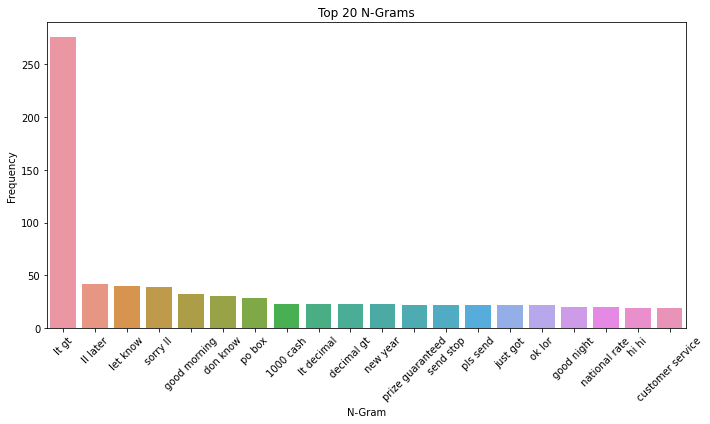

In [9]:
# Top N-Grams Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = cv.fit_transform(df['sms'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]
top_ngrams = [word[0] for word in words_freq]
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in words_freq], y=[word[1] for word in words_freq])
plt.title('Top 20 N-Grams')
plt.xlabel('N-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Classes Distribution

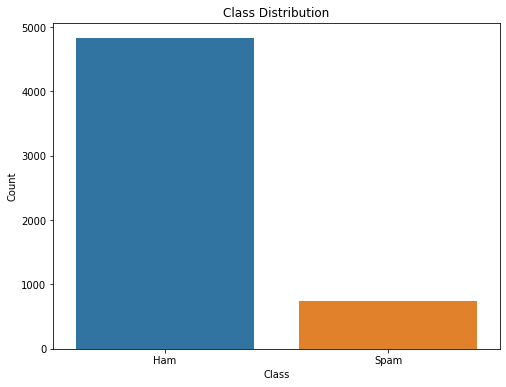

In [14]:
# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# messages length distribution

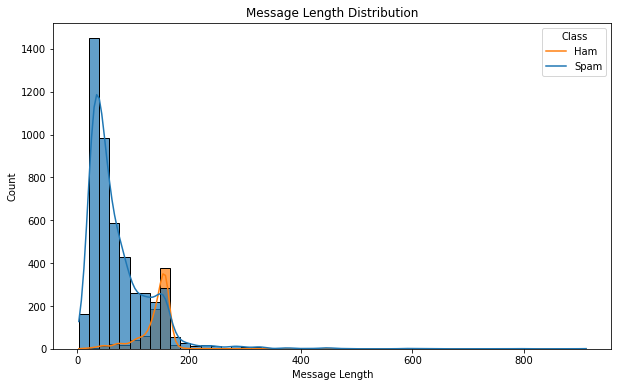

In [15]:
# Plot message length distribution
df['message_length'] = df['sms'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, alpha=0.7)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Ham', 'Spam'])
plt.show()

# Word Clouds for both spam and hem messages

[nltk_data] Downloading package stopwords to C:\Users\Noor
[nltk_data]     Saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


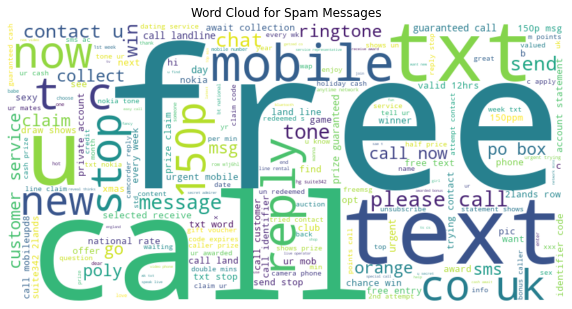

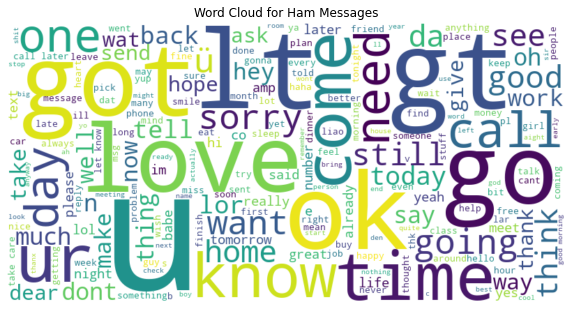

In [17]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define stopwords for English
stop_words = set(stopwords.words('english'))

# Remove stopwords from spam and ham messages
spam_messages = df[df['label'] == 1]['sms'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
ham_messages = df[df['label'] == 0]['sms'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Generate word cloud for spam messages
plt.figure(figsize=(10, 8))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# Generate word cloud for ham messages
plt.figure(figsize=(10, 8))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()


# Clean Text

In [18]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Initialize Porter Stemmer
    stemmer = PorterStemmer()
    
    # Perform stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words back into a single string
    cleaned_text = ' '.join(stemmed_words)
    
    return cleaned_text

In [19]:
df['clean_text'] = df['sms'].apply(lambda x: clean_text(x))

In [20]:
df['label'].value_counts()

0    4827
1     747
Name: label, dtype: int64

# Balance Dataset

In [21]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your DataFrame containing the data
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable

# Initialize the resampling technique
oversampler = RandomOverSampler()

# Perform the resampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame for the balanced dataset
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

df_balanced['label'].value_counts()

0    4827
1    4827
Name: label, dtype: int64

In [22]:
df_balanced

,sms,sentiment,emotion,positive,negative,neutral,message_length,clean_text,label
0,"Go until jurong point, crazy.. Available only ...",0.150000,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.194,0.000,0.806,112,go jurong point crazi avail bugi n great world...,0
1,Ok lar... Joking wif u oni...\n,0.500000,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.577,0.000,0.423,30,ok lar joke wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0.300000,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.228,0.000,0.772,156,free entri wkli comp win fa cup final tkt st m...,1
3,U dun say so early hor... U c already then say...,0.100000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,50,u dun say earli hor u c alreadi say,0
4,"Nah I don't think he goes to usf, he lives aro...",0.000000,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",0.000,0.113,0.887,62,nah dont think goe usf live around though,0
...,...,...,...,...,...,...,...,...,...
9649,Your weekly Cool-Mob tones are ready to downlo...,-0.095076,"{'neg': 0.085, 'neu': 0.816, 'pos': 0.099, 'co...",0.099,0.085,0.816,161,weekli coolmob tone readi download week new to...,1
9650,Customer service announcement. We recently tri...,-0.250000,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.153,0.000,0.847,153,custom servic announc recent tri make deliveri...,1
9651,"44 7732584351, Do you want a New Nokia 3510i c...",0.334091,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.327,0.000,0.673,174,want new nokia colour phone deliveredtomorrow ...,1
9652,Congratulations! Thanks to a good friend U hav...,0.360417,"{'neg': 0.0, 'neu': 0.399, 'pos': 0.601, 'comp...",0.601,0.000,0.399,157,congratul thank good friend u xma prize claim ...,1


# Train Models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Random Forest classifier

In [27]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[954   0]
 [ 27 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.83      0.91       161

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



# Logic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_lr)
print("\nLogistic Regression - Classification Report:")
print(class_report_lr)


Logistic Regression - Confusion Matrix:
[[950   4]
 [ 38 123]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       0.97      0.76      0.85       161

    accuracy                           0.96      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115



# SVM

In [35]:
from sklearn.svm import SVC

# SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM - Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM - Classification Report:")
print(class_report_svm)


SVM - Confusion Matrix:
[[949   5]
 [ 16 145]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       954
           1       0.97      0.90      0.93       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Enssenble Hard Voting

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# Define the ensemble classifier with SVM
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('logistic_regression', lr_classifier),
    ('svm', svm_classifier)
], voting='hard')  # 'hard' voting for a majority rule

# Fit the ensemble classifier on TF-IDF features
ensemble_classifier.fit(X_train_tfidf, y_train)

# Predictions using ensemble classifier
y_pred_ensemble = ensemble_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for ensemble classifier
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
class_report_ensemble = classification_report(y_test, y_pred_ensemble)

print("Ensemble Classifier - Confusion Matrix:")
print(conf_matrix_ensemble)
print("\nEnsemble Classifier - Classification Report:")
print(class_report_ensemble)


Ensemble Classifier - Confusion Matrix:
[[952   2]
 [ 24 137]]

Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.85      0.91       161

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Enssenble Soft voting

In [37]:
# Define the ensemble classifier with soft voting
# SVM classifier with probability estimates enabled
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)

ensemble_classifier_soft = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('logistic_regression', lr_classifier),
    ('svm', svm_classifier)
], voting='soft')  # 'soft' voting for weighted average based on probabilities

# Fit the ensemble classifier on TF-IDF features
ensemble_classifier_soft.fit(X_train_tfidf, y_train)

# Predictions using ensemble classifier with soft voting
y_pred_ensemble_soft = ensemble_classifier_soft.predict(X_test_tfidf)

# Confusion matrix and classification report for ensemble classifier with soft voting
conf_matrix_ensemble_soft = confusion_matrix(y_test, y_pred_ensemble_soft)
class_report_ensemble_soft = classification_report(y_test, y_pred_ensemble_soft)

print("Ensemble Classifier (Soft Voting) - Confusion Matrix:")
print(conf_matrix_ensemble_soft)
print("\nEnsemble Classifier (Soft Voting) - Classification Report:")
print(class_report_ensemble_soft)

Ensemble Classifier (Soft Voting) - Confusion Matrix:
[[951   3]
 [ 16 145]]

Ensemble Classifier (Soft Voting) - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Save Model and TFIDF

In [38]:
import pickle 
pickle.dump(rf_classifier, open("model.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf.pkl",'wb'))

In [39]:
import pickle

# Load the Random Forest model
with open("model.pkl", 'rb') as file:
    rf_classifier = pickle.load(file)

# Load the TF-IDF vectorizer
with open("tfidf.pkl", 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

# Detection System

In [40]:
def predict_fake_or_real(text):
    # Clean the input text
    cleaned_text = clean_text(text)
    
    # Transform the cleaned text using the TF-IDF vectorizer
    text_tfidf = tfidf_vectorizer.transform([cleaned_text])
    
    # Use the trained classifier to predict
    prediction = rf_classifier.predict(text_tfidf)
    
    # Map prediction to label
    label = "fake" if prediction[0] == 1 else "real"
    
    return label


In [41]:
# Example usage:
input_text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.\n"

prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: real


In [42]:
# Example usage:
input_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"
prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: fake


In [43]:
# Example usage:
input_text = 'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16'

prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: fake


In [44]:
import sklearn
sklearn.__version__

'1.4.2'

In [45]:
df['sms'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"